# This notebook plots REMA elevations on radarlines

The code for getting this data is at:
/home/arran/PHD/DATA/code/REMOTE_SENSING/REMA/radarlines_over_REMA.py

In [1]:

import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate

from shapely.geometry import LineString


gis_path ="/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
REMA_filepath = '/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/'
indicies_which_intersect = np.loadtxt("/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/indicies_which_intersect.txt").astype(int).tolist()
lines_files_paths = glob.glob(os.path.join(gis_path,"**.gpkg"),recursive=True)
lines_names = [os.path.splitext(os.path.split(line_file_path )[1])[0] for line_file_path in lines_files_paths]
REMA_shapes_df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp',crs="EPSG:3031").iloc[indicies_which_intersect]

In [2]:
#open the dictionary associating each line with REMA strips
with open(gis_path+'REMAnid_over_radarlines.txt','r') as f:
    ld = eval(f.read())


line_index = [x for x in zip(lines_names,range(len(lines_names)))]

#print the line names with an index
print(lines_names)

['lineAPRESdown', 'left1415', 'left810', 'line8', 'line6', 'line11', 'right68', 'right13', 'lineback2camp', 'left02', 'line4', 'line2', 'right24', 'lineseis12', 'line0bKIS1', 'line7', 'left79', 'linestart', 'lineupchan', 'right1112', 'line250', 'line0a', 'linedownchan', 'left46', 'left1011', 'line3', 'right910', 'line14', 'line13', 'lineend', 'line7p5', 'lineseis34', 'linen500', 'left35', 'line9', 'line7p75', 'left1213', 'line10', 'line12', 'line0KIS1', 'line0', 'right1314', 'lineseis56', 'lineAPREScross', 'linen250', 'line500', 'line5', 'line7p25', 'line1']


In [3]:
ld['line4']

['nid_122088',
 'nid_131225',
 'nid_131226',
 'nid_131228',
 'nid_145073',
 'nid_159199',
 'nid_159200',
 'nid_159202']

In [4]:
df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')

In [5]:
df.keys()

Index(['objectid', 'name', 'pairname', 'catalogid1', 'catalogid2', 'nd_value',
       'resolution', 'algm_ver', 'creationda', 'raster', 'fileurl',
       'acquisitio', 'spec_type', 'sensor1', 'qual', 'dx', 'dy', 'dz',
       'reg_src', 'num_gcps', 'meanresz', 'active', 'qc', 'rel_ver',
       'acquisit_1', 'sensor2', 'st_area_sh', 'st_length_', 'geometry'],
      dtype='object')

In [6]:

def plot_line(line_name, df=df,legend='date', remove_trend=True,lr=False):
    """
    Plots the radarline with REMA elevations.
    each elevation line has a linear line between first and last points removed, to try and reduce tide effects.
    only use this on lines perpendicular to channel
    """
    leg = []
    rl = gpd.read_file(gis_path+line_name+".shp")
    plt.figure(figsize=(10,7))
    for REMA in ld[line_name]:
        
        nid = int(REMA.split('_')[1])
        date = df.loc[nid].acquisitio
        #whether to flip line lr
        if (rl.geometry.x.iloc[0] - rl.geometry.x.iloc[-1]) < 0:
            lr=False
        else:
            lr=True
        
        if lr==True:
            remaline =  rl[REMA].iloc[::-1]
        else:
            remaline =  rl[REMA]
        if remove_trend==True:
            #make line from first to last point
            f = interpolate.interp1d( [rl.distan_cum.iloc[0],rl.distan_cum.iloc[-1]], [rl[REMA].iloc[0],rl[REMA].iloc[-1]])
            trendline = f(rl.distan_cum)
            if lr==True:
                plt.plot(rl.distan_cum,remaline-trendline[::-1])
            else:
                plt.plot(rl.distan_cum,remaline-trendline)
                    
        else:
            plt.plot(rl.distan_cum,remaline)
        plt.title(line_name)
        if legend=='date':
            leg.append(date)
        elif legend=='nid':
            leg.append(nid)
        
        
    plt.legend(leg) 
    plt.grid(True)
    plt.xlabel("distance, 'm'")
#     plt.xlim([-200,4500])
#     plt.ylim([-18,2])
    plt.show()
  

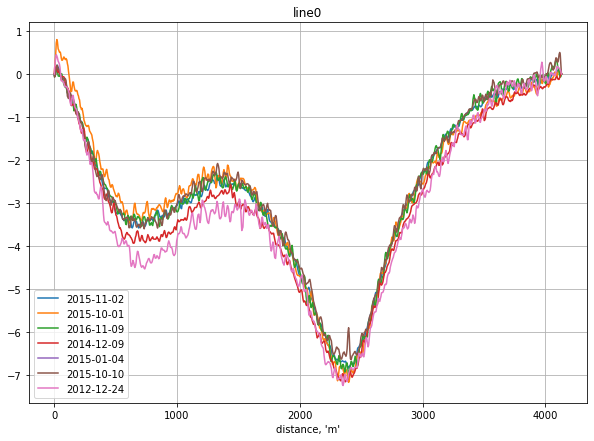

In [7]:
plot_line('line0')

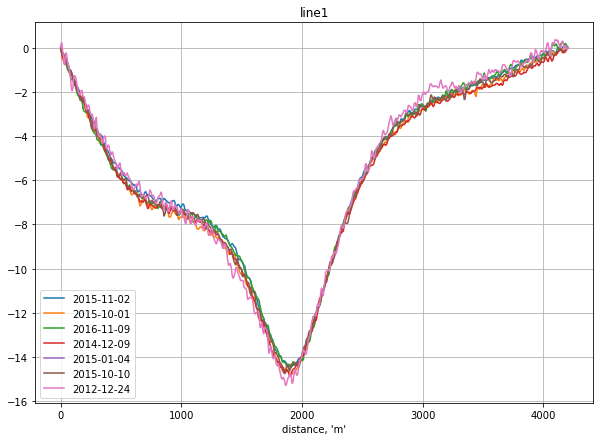

In [8]:
plot_line('line1')

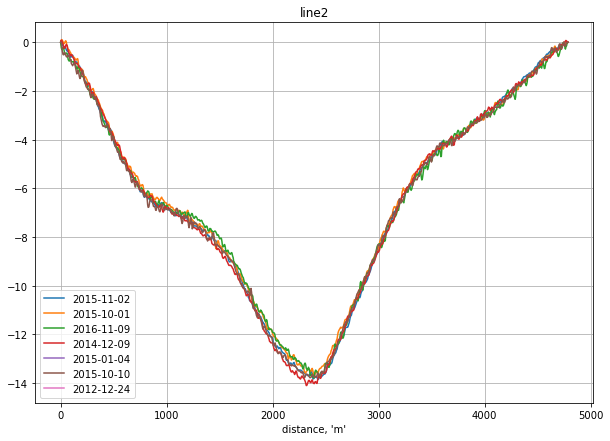

In [9]:
plot_line('line2')

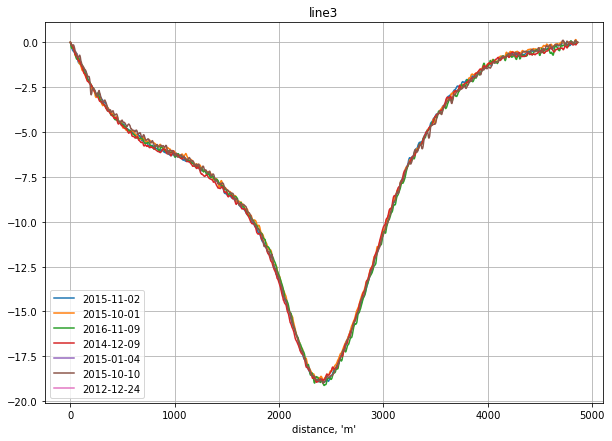

In [10]:
plot_line('line3')

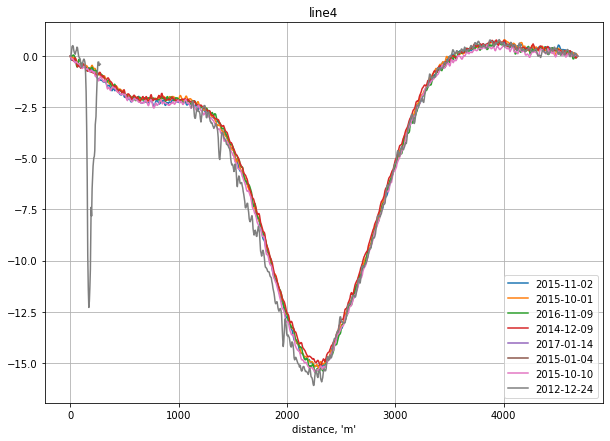

In [11]:
plot_line('line4')

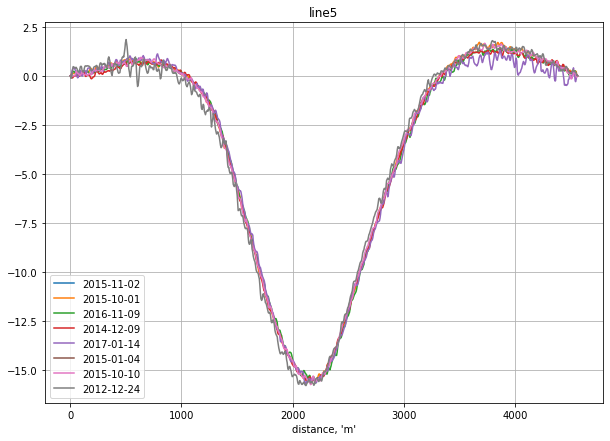

In [12]:
plot_line('line5')

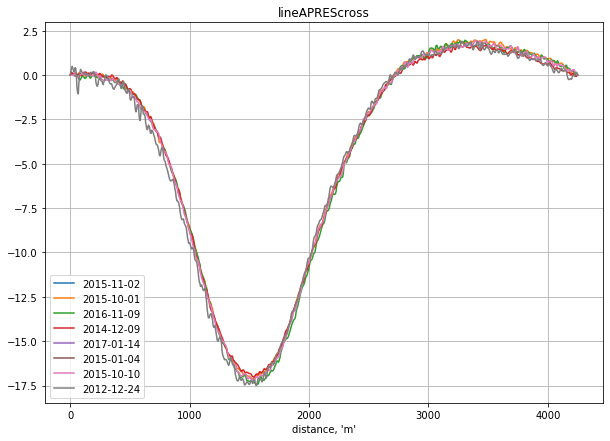

In [13]:
plot_line('lineAPREScross')

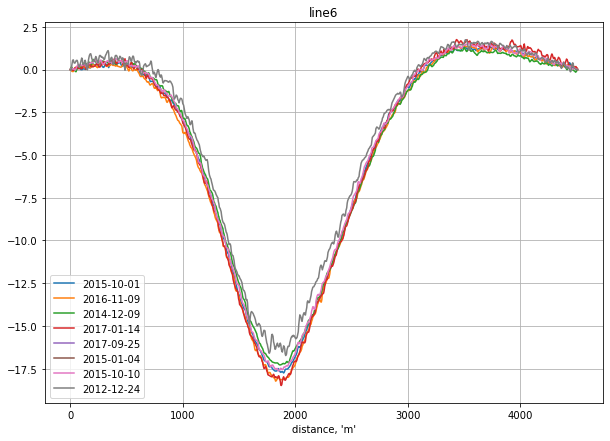

In [14]:
plot_line('line6')

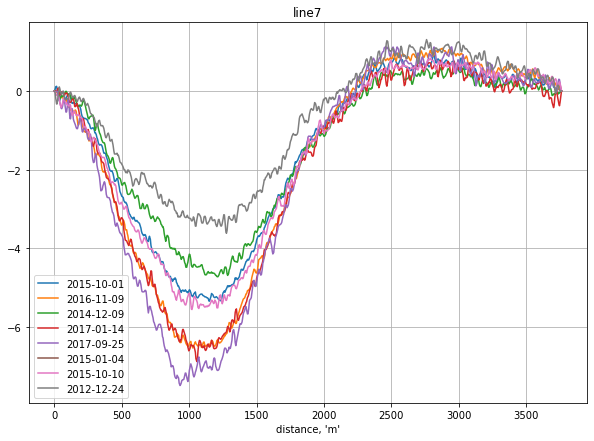

In [15]:
plot_line('line7')

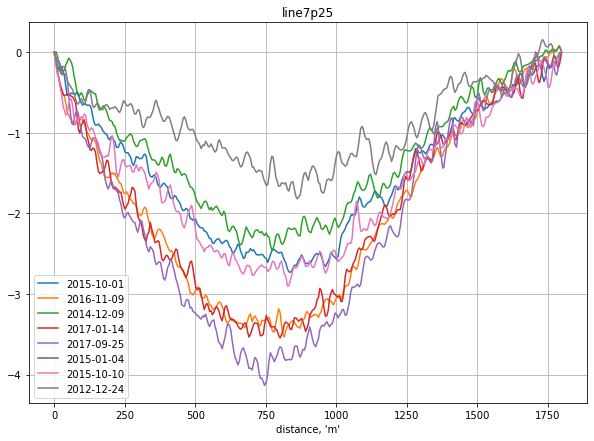

In [16]:
plot_line('line7p25')

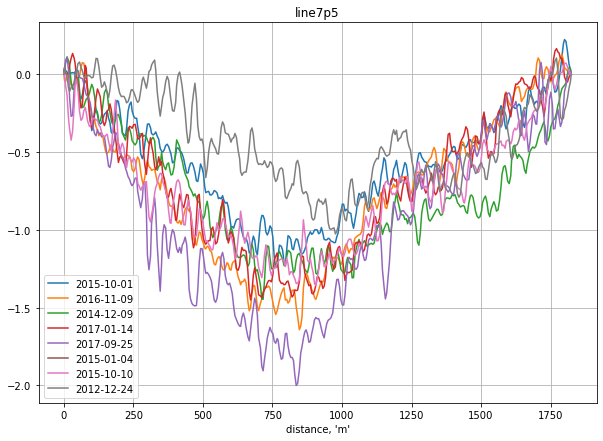

In [17]:
plot_line('line7p5')

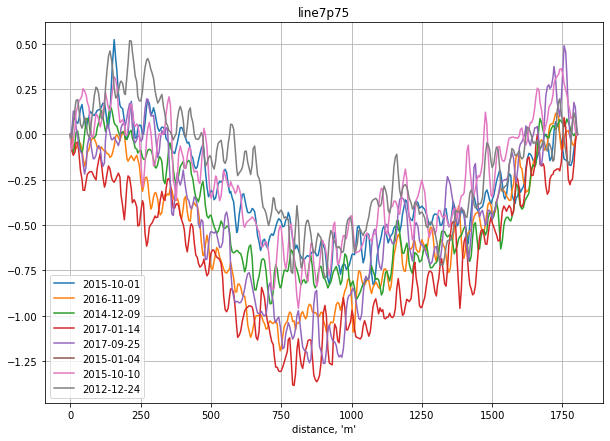

In [18]:
plot_line('line7p75')

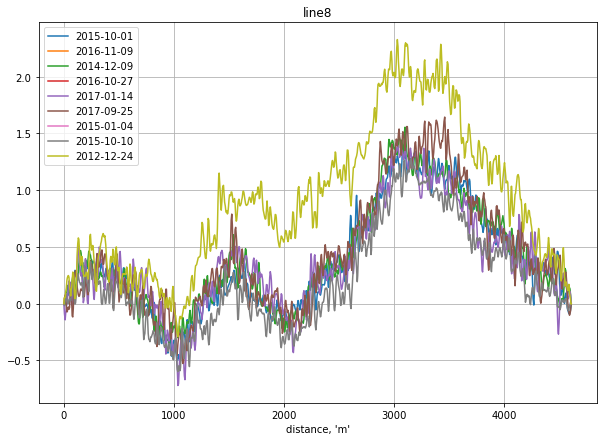

In [19]:
plot_line('line8')

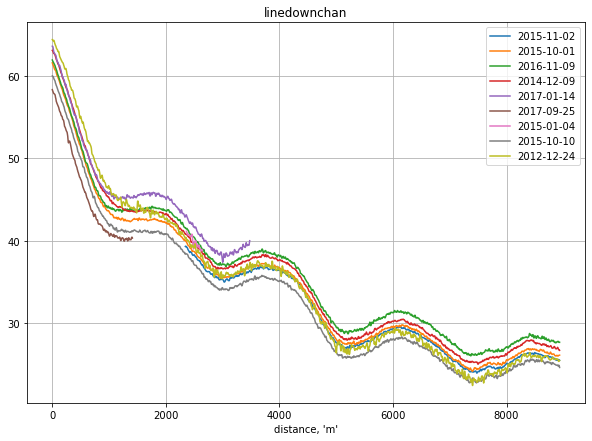

In [20]:
plot_line('linedownchan',remove_trend=False)

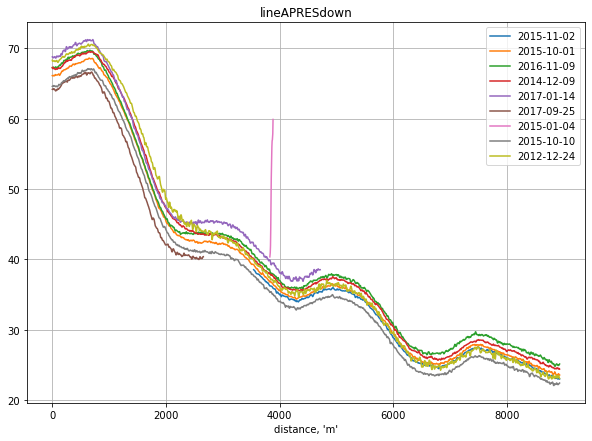

In [21]:
plot_line('lineAPRESdown',remove_trend=False)

## Ideas

We can see the greatest growth in the channel is around line7

In line0, its growing in a different spot

# Look at line 7

## We can take the full tifs and look at diffs



In [22]:
kis2 = [-380737.537026,-724683.311299]

In [23]:
ld['line7']

['nid_131225',
 'nid_131226',
 'nid_131228',
 'nid_145073',
 'nid_145074',
 'nid_159199',
 'nid_159200',
 'nid_159202']

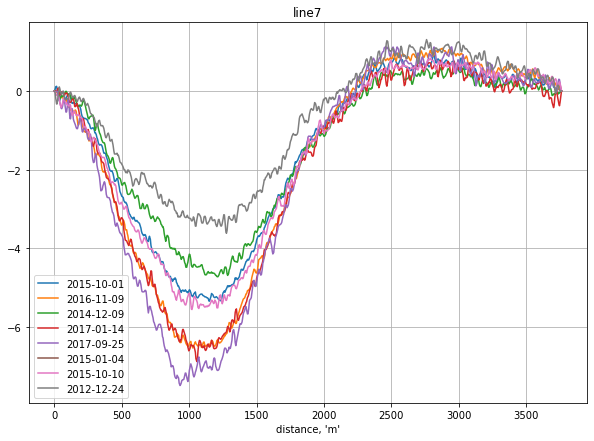

In [24]:
plot_line('line7')

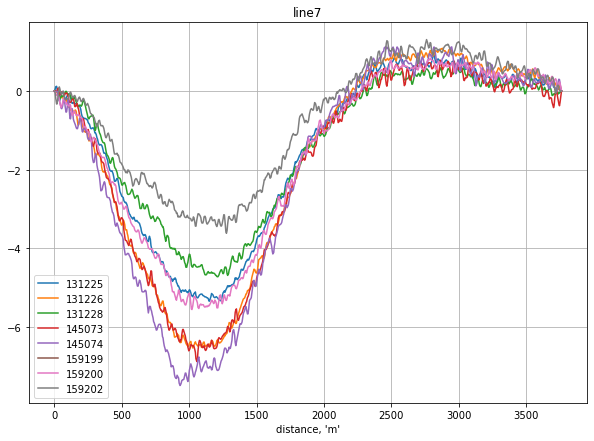

In [25]:
plot_line('line7',legend='nid')

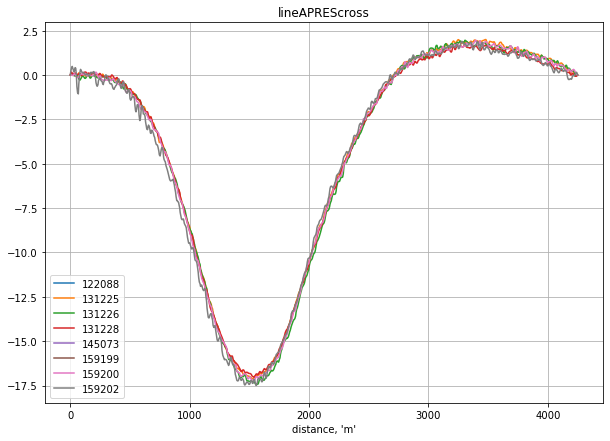

In [26]:
plot_line('lineAPREScross',legend='nid')

So the least channel, grey line, is at 2012, nid 159202
the most channel is at purple line 2017, nid 145074

In [27]:
nid1 = 159202
nid2 = 145074
line_name = 'line7'



In [28]:
def plot_REMA_diff(nid1,nid2,line_name,df=df,v=[0,2]):
    
    path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
    image = rio.open(path)
    extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    gdf = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
    f = df.loc[nid1].acquisitio
    t =df.loc[nid2].acquisitio
    duration = (pd.to_datetime(t)-pd.to_datetime(f)).days/365.25
    xmin,xmax = [gdf.geometry.x.to_numpy().min(),gdf.geometry.x.to_numpy().max()]
    ymin,ymax = [gdf.geometry.y.to_numpy().min(),gdf.geometry.y.to_numpy().max()]
    plt.figure(figsize=(15,14))
    im = image.read(1)
    im[im==-9999] = np.nan
    im = im / duration
    plt.imshow(im,extent=extent, vmin=v[0],vmax=v[1])
    plt.xlim([xmin-1000, xmax])
    plt.ylim([ymin-1000,ymax])
    cb = plt.colorbar()
    plt.plot(gdf.geometry.x,gdf.geometry.y,'y')
    plt.plot(kis2[0],kis2[1],'y^')
    plt.title(f'REMA elevation change from {f} till {t}')
    cb.set_label('rate of elevation change, m/a')
    

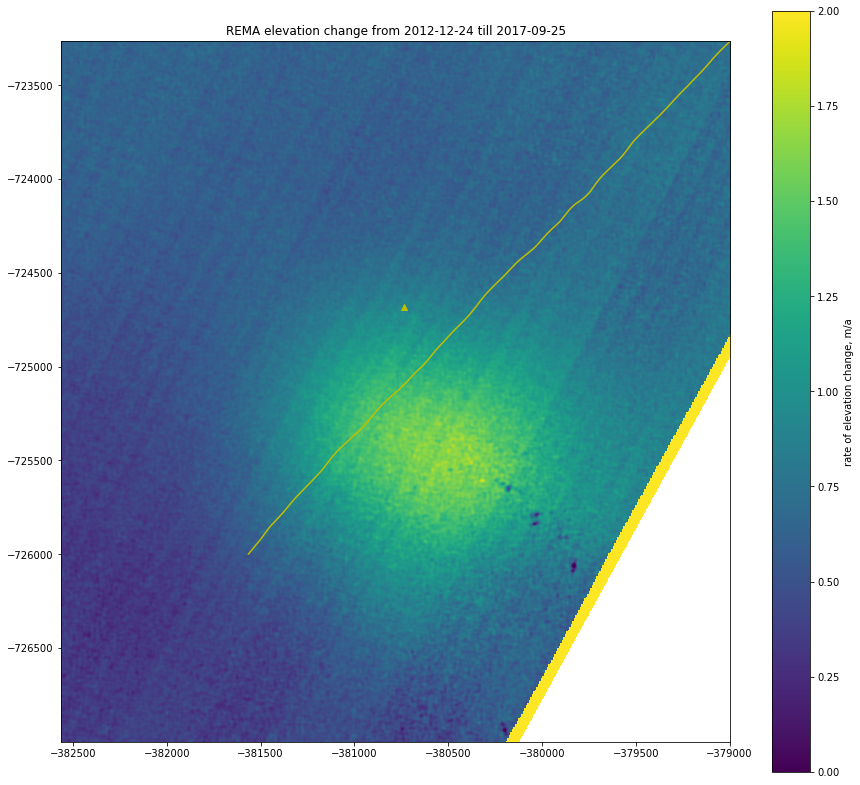

In [29]:
plot_REMA_diff(159202,145074,line_name)

# Now try line 5
note with one diff tif

In [30]:
line_name = 'line7'

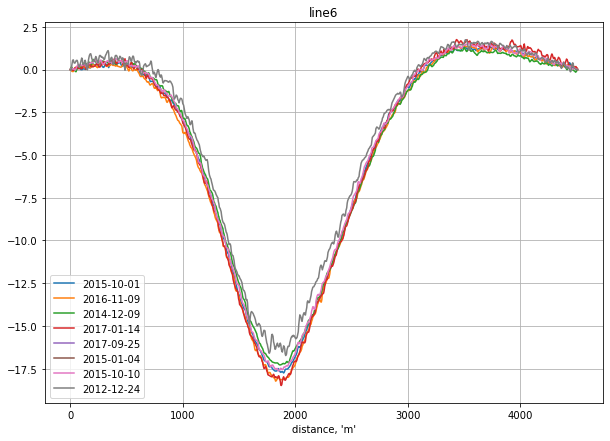

In [31]:
plot_line('line6')

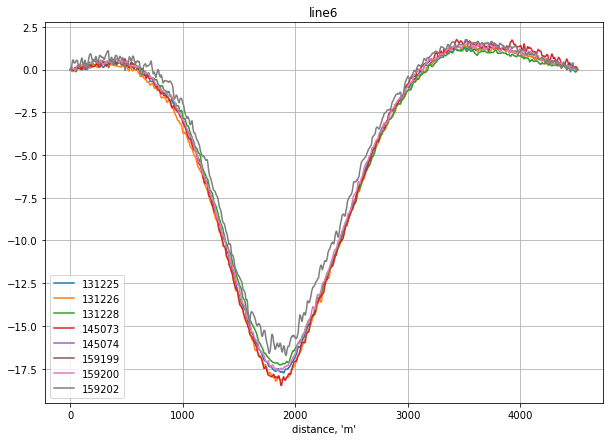

In [32]:
plot_line('line6',legend='nid')

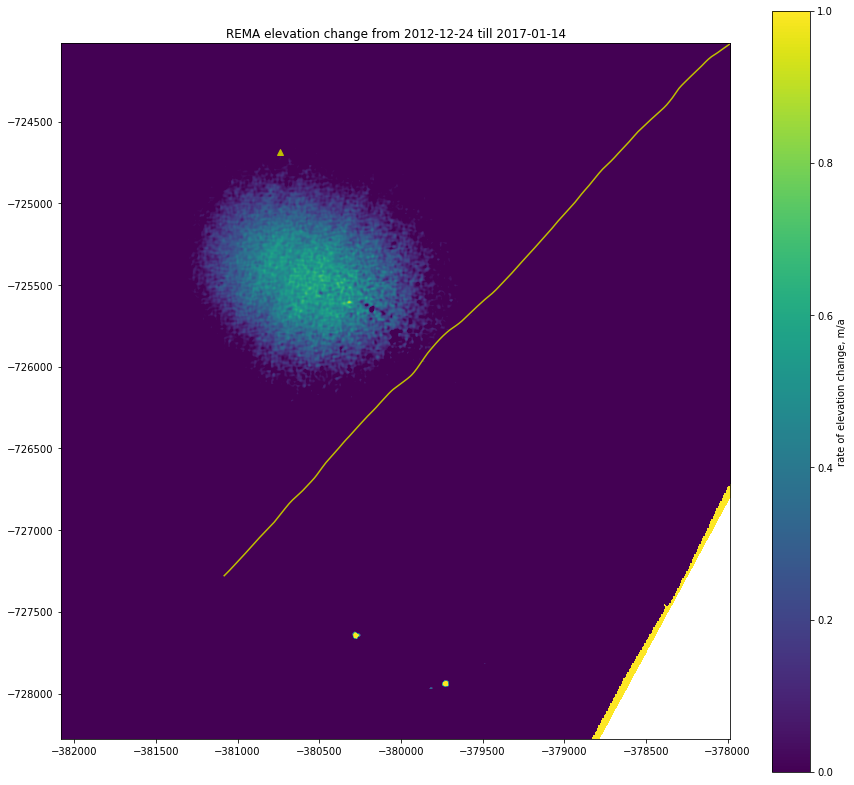

In [33]:
plot_REMA_diff(159202, 145073,'line6',v=[0,1])

# Now try line 0

note with one diff tif

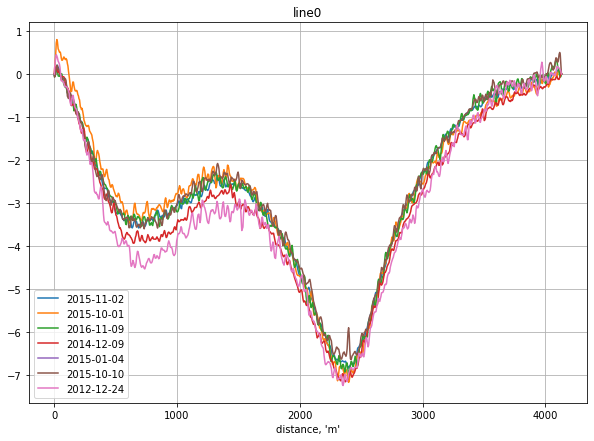

In [34]:
plot_line('line0')

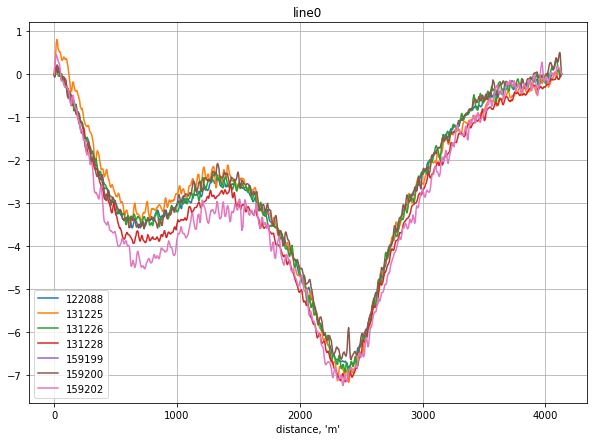

In [35]:
plot_line('line0',legend='nid')

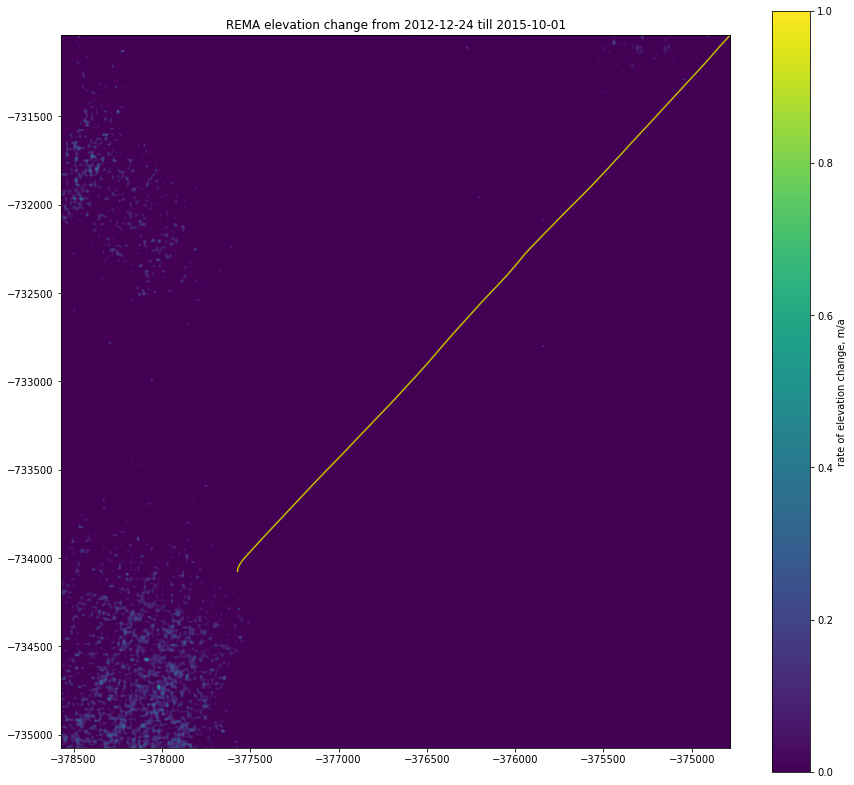

In [36]:
plot_REMA_diff(159202, 131225,'line0',v=[0,1])

# Now try line downchan

note with one diff tif

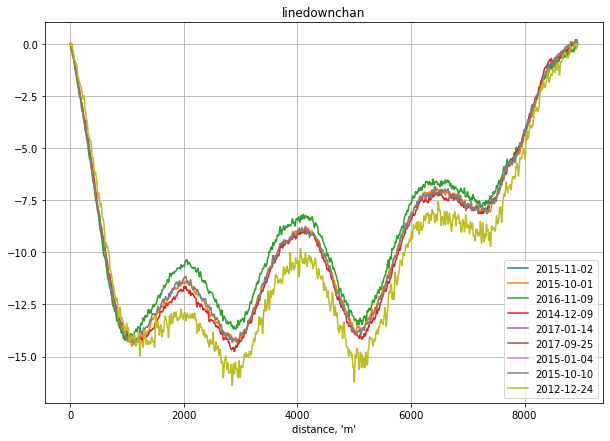

In [37]:
plot_line('linedownchan')

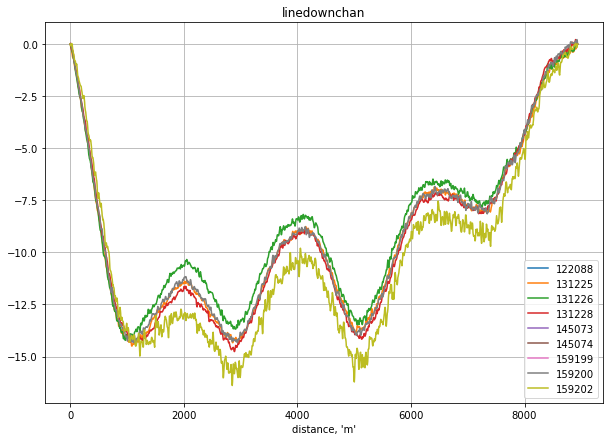

In [38]:
plot_line('linedownchan',legend='nid')

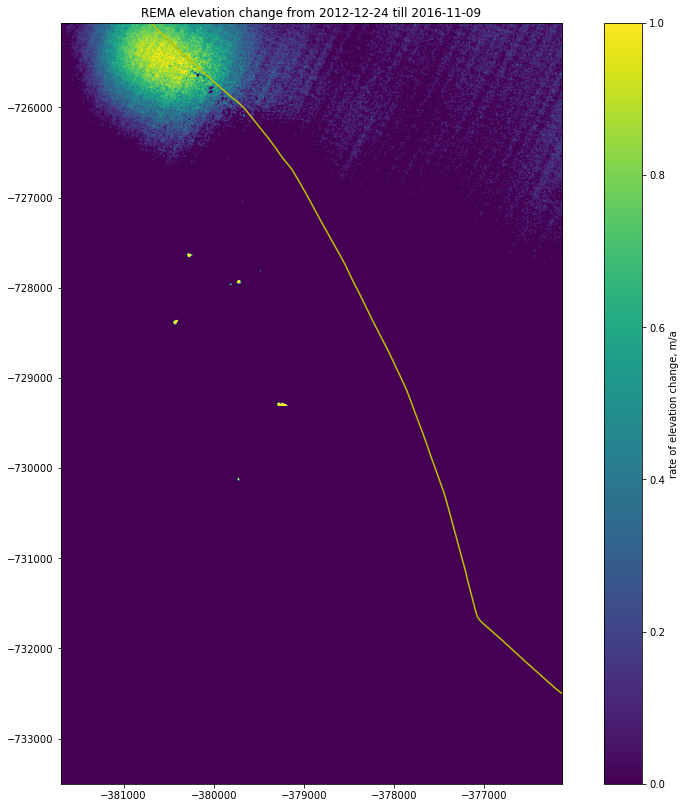

In [39]:
plot_REMA_diff(159202, 131226,'linedownchan',v=[0,1])